In [ ]:
# Projekat

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import datasets
import seaborn as sns
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import  LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [4]:
df = pd.read_csv('cardio_train.csv',delimiter=';')

In [3]:
df.shape

(70000, 13)

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df.describe()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


# Procenat uzoraka u odredjenoj klasi
Kod ispod racuna procenat ljudi koji imaju ili nemaju neku od kardiovaskularnih bolesti.

In [ ]:
print('Procenat osoba koje nemaju kardiovaskularne bolesti',(np.sum(df.loc[:,'cardio']==0)/len(df))*100, ' %')
print('Procenat osoba koje imaju kardiovaskularne bolesti',(np.sum(df.loc[:,'cardio']==1)/len(df))*100, ' %')

Procenat osoba koje nemaju kardiovaskularne bolesti 50.029999999999994  %
Procenat osoba koje imaju kardiovaskularne bolesti 49.97  %


# Brisanje podataka i analiza

In [ ]:
print('Broj ljudi koji su nizi od 120 cm prema datoj bazi',np.sum(df.loc[:,'height']<120))
print('Broj ljudi koji imaju manju kilazu od 50 kg',np.sum(df.loc[:,'weight']<50))

Broj ljudi koji su nizi od 120 cm prema datoj bazi 52
Broj ljudi koji imaju manju kilazu od 50 kg 987


## Promena negativnih vrednosti sistolnog i dijastolnog pritiska

In [ ]:
print('Broj ljudi koji imaju negativan sistolni pritisak ',np.sum(df.loc[:,'ap_hi']<0))
print('Broj ljudi koji imaju negativan dijastolni pritisak ',np.sum(df.loc[:,'ap_lo']<0))

Broj ljudi koji imaju negativan sistolni pritisak  7
Broj ljudi koji imaju negativan dijastolni pritisak  1


In [5]:
negativne_vrednosti_sistolni = df.loc[df['ap_hi']<0,'ap_hi'].unique()
for i in negativne_vrednosti_sistolni:
  df['ap_hi'].replace(negativne_vrednosti_sistolni,abs(negativne_vrednosti_sistolni), inplace=True)

negativne_vrednosti_dijastolni = df.loc[df['ap_lo']<0,'ap_lo'].unique()
for i in negativne_vrednosti_dijastolni:
  df['ap_lo'].replace(negativne_vrednosti_dijastolni,abs(negativne_vrednosti_dijastolni), inplace=True)

C:\Users\milica\AppData\Local\Temp\ipykernel_9268\3844641634.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ap_hi'].replace(negativne_vrednosti_sistolni,abs(negativne_vrednosti_sistolni), inplace=True)
C:\Users\milica\AppData\Local\Temp\ipykernel_9268\3844641634.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

In [ ]:
df.describe()

## Izbacivanje nevalidnih vrednosti i obelezja koja nisu potrebna za dalju analizu

In [6]:
inx = df.loc[df['height']<120].index
df.drop(inx, inplace= True, axis = 0)

inx1 = df.loc[df['ap_hi']>370].index
df.drop(inx1, inplace= True, axis = 0)

inx2 = df.loc[df['ap_lo']>360].index
df.drop(inx2, inplace= True, axis = 0)

inx3 = df.loc[df['ap_hi']<50].index
df.drop(inx3, inplace= True, axis = 0)

inx4 = df.loc[df['ap_lo']<20].index
df.drop(inx4, inplace= True, axis = 0)

inx5 = df.loc[df['weight']<50].index
df.drop(inx5, inplace= True, axis = 0)

y = df['cardio']
df.drop(['id', 'cardio'], inplace= True, axis = 1)



## Broj uzoraka i obelezja nakon brisanja uzoraka

In [7]:
x = df
x.shape

(67776, 11)

# Korelacija

<Axes: >

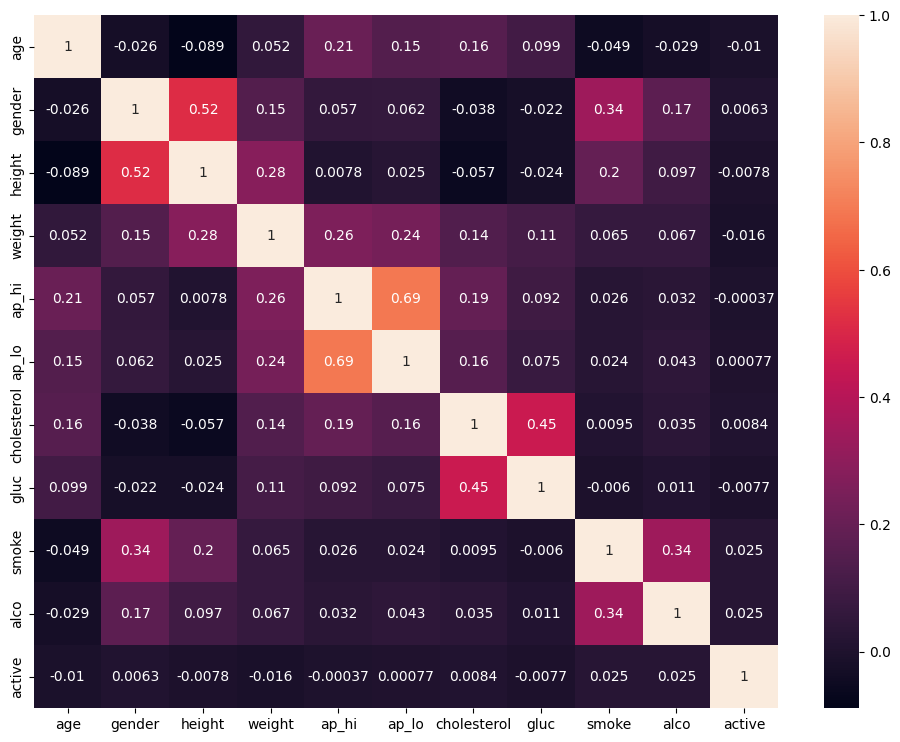

In [ ]:
df['weight'] = df['weight'].astype(int)
numerical_feats = df.dtypes[df.dtypes == "int64"].index

corr = df[numerical_feats].corr()
f = plt.figure(figsize=(12, 9))
sns.heatmap(corr, annot=True)

# Histogrami

## Sistolni pritisak

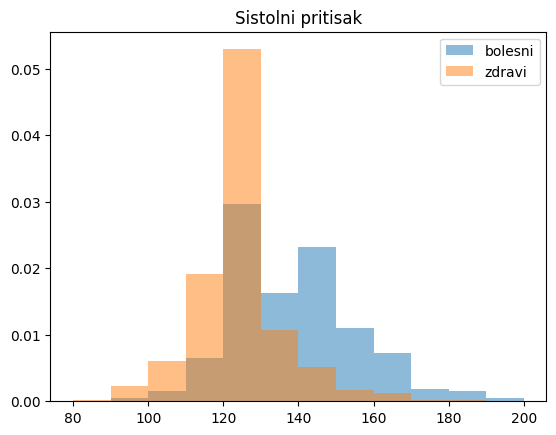

In [11]:
sistolni_bolesni=df.loc[y == 1, 'ap_hi']
sistolni_zdravi=df.loc[y == 0, 'ap_hi']
plt.hist(sistolni_bolesni, bins=np.arange(80,210,10), alpha=0.5, label='bolesni', density=True)
plt.hist(sistolni_zdravi, bins=np.arange(80,210,10), alpha=0.5, label='zdravi', density=True)
plt.title('Sistolni pritisak')
plt.legend()

## Dijastolni pritisak

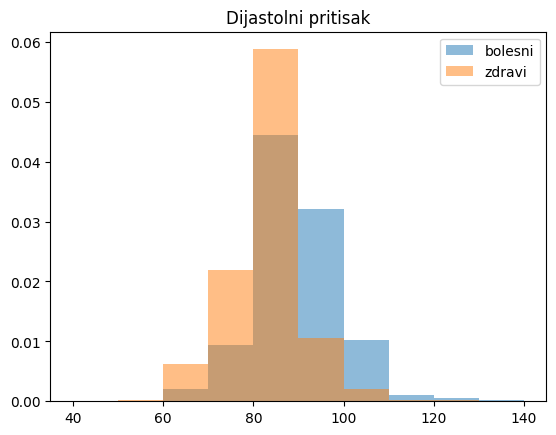

In [12]:
dijastolni_bolesni=df.loc[y == 1, 'ap_lo']
dijastolni_zdravi=df.loc[y == 0, 'ap_lo']
plt.hist(dijastolni_bolesni, bins=np.arange(40,150,10), alpha=0.5, label='bolesni', density=True)
plt.hist(dijastolni_zdravi, bins=np.arange(40,150,10), alpha=0.5, label='zdravi', density=True)
plt.title('Dijastolni pritisak')
plt.legend()

## Godine ispitanika

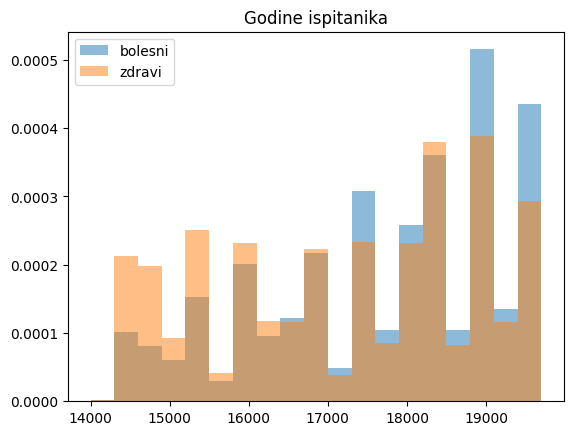

In [27]:
godine_bolesni=df.loc[y == 1, 'age']
godine_zdravi=df.loc[y == 0, 'age']
plt.hist(godine_bolesni, bins=np.arange(14000,20000,300), alpha=0.5, label='bolesni', density=True)
plt.hist(godine_zdravi, bins=np.arange(14000,20000,300), alpha=0.5, label='zdravi', density=True)
plt.title('Godine ispitanika')
plt.legend()

## Nivo holesterola

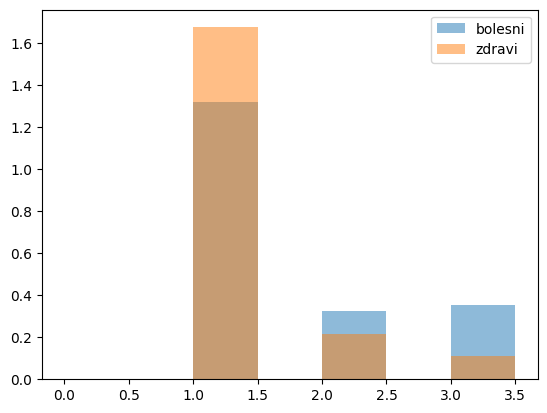

In [26]:
holest_bolesni=df.loc[y == 1, 'cholesterol']
holest_zdravi=df.loc[y == 0, 'cholesterol']
plt.hist(holest_bolesni, bins=np.arange(0,4,0.5), alpha=0.5, label='bolesni', density=True)
plt.hist(holest_zdravi, bins=np.arange(0,4,0.5), alpha=0.5, label='zdravi', density=True)
plt.legend()

## Glukoza

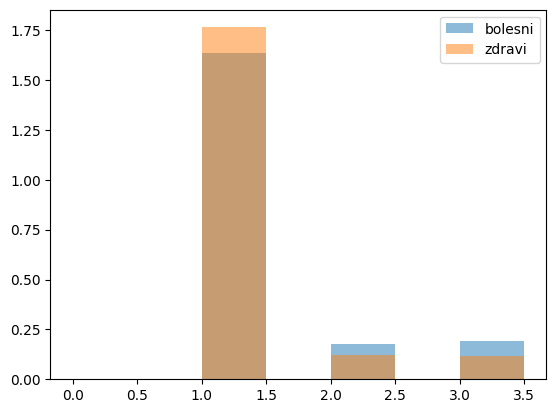

In [25]:
gluc_bolesni=df.loc[y == 1, 'gluc']
gluc_zdravi=df.loc[y == 0, 'gluc']
plt.hist(gluc_bolesni, bins=np.arange(0,4,0.5), alpha=0.5, label='bolesni', density=True)
plt.hist(gluc_zdravi, bins=np.arange(0,4,0.5), alpha=0.5, label='zdravi', density=True)
plt.legend()

## Pusac

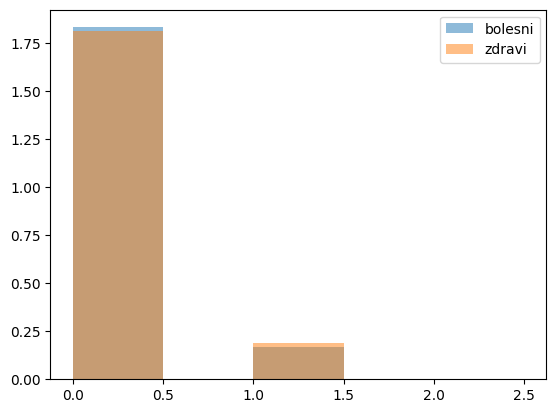

In [24]:
smoke_bolesni=df.loc[y == 1, 'smoke']
smoke_zdravi=df.loc[y == 0, 'smoke']
plt.hist(smoke_bolesni, bins=np.arange(0,3,0.5), alpha=0.5, label='bolesni', density=True)
plt.hist(smoke_zdravi, bins=np.arange(0,3,0.5), alpha=0.5, label='zdravi', density=True)
plt.legend()


## Alkohol

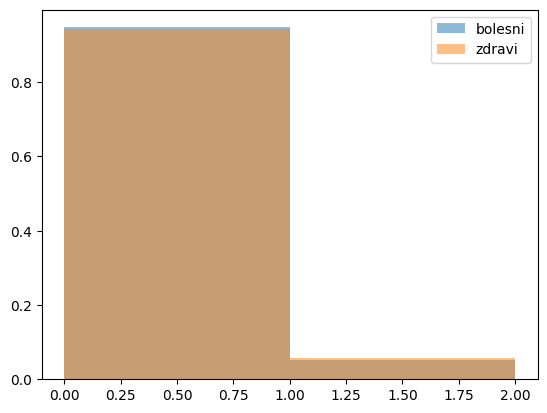

In [23]:
alco_bolesni=df.loc[y == 1, 'alco']
alco_zdravi=df.loc[y == 0, 'alco']
plt.hist(alco_bolesni, bins=np.arange(0,3,1), alpha=0.5, label='bolesni', density=True)
plt.hist(alco_zdravi, bins=np.arange(0,3,1), alpha=0.5, label='zdravi', density=True)
plt.legend()

## Aktivnost

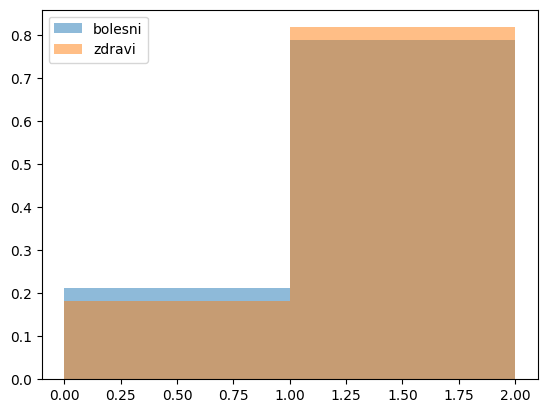

In [22]:
active_bolesni=df.loc[y == 1, 'active']
active_zdravi=df.loc[y == 0, 'active']
plt.hist(active_bolesni, bins=np.arange(0,3,1), alpha=0.5, label='bolesni', density=True)
plt.hist(active_zdravi, bins=np.arange(0,3,1), alpha=0.5, label='zdravi', density=True)
plt.legend()

## Masa

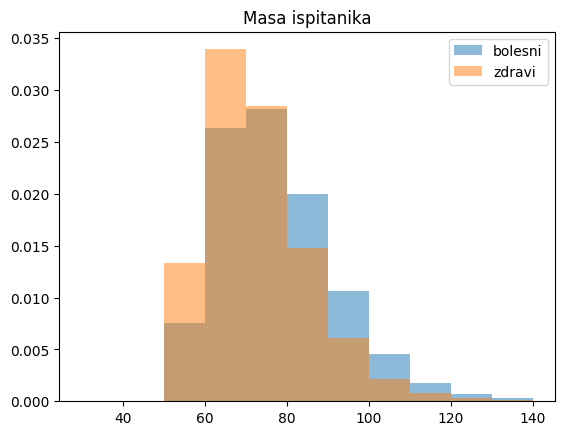

In [13]:
weight_bolesni=df.loc[y == 1, 'weight']
weight_zdravi=df.loc[y == 0, 'weight']
plt.hist(weight_bolesni, bins=np.arange(30,150,10), alpha=0.5, label='bolesni', density=True)
plt.hist(weight_zdravi, bins=np.arange(30,150,10), alpha=0.5, label='zdravi', density=True)
plt.title('Masa ispitanika')
plt.legend()

# Autlajeri

## Godine

{'whiskers': [<matplotlib.lines.Line2D at 0x211ddc23410>,
 'caps': [<matplotlib.lines.Line2D at 0x211ded5ec50>,
 'boxes': [<matplotlib.lines.Line2D at 0x211def64850>],
 'medians': [<matplotlib.lines.Line2D at 0x211df2a2dd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x211defe7fd0>],
 'means': []}

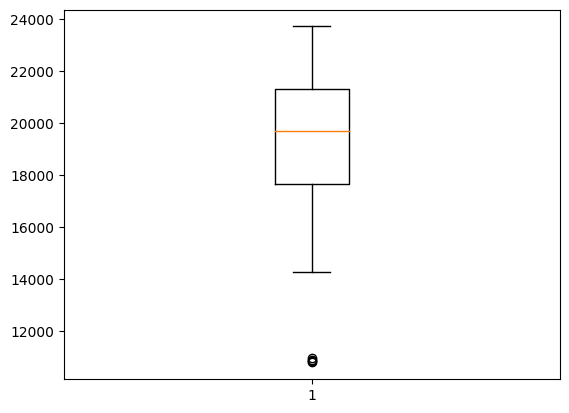

In [28]:
plt.boxplot(df['age'])

## Dijastolni pritisak

{'whiskers': [<matplotlib.lines.Line2D at 0x211df2efd50>,
 'caps': [<matplotlib.lines.Line2D at 0x211dedca4d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x211df2eda10>],
 'medians': [<matplotlib.lines.Line2D at 0x211def67410>],
 'fliers': [<matplotlib.lines.Line2D at 0x211df2ec790>],
 'means': []}

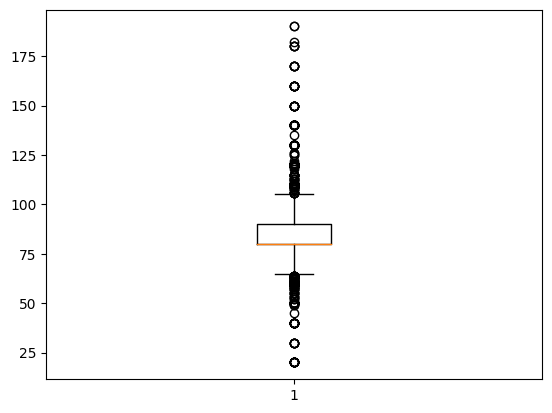

In [29]:
plt.boxplot(df['ap_lo'])

## Sistolni pritisak

{'whiskers': [<matplotlib.lines.Line2D at 0x211df2f2c90>,
 'caps': [<matplotlib.lines.Line2D at 0x211df2f0990>,
 'boxes': [<matplotlib.lines.Line2D at 0x211df23e750>],
 'medians': [<matplotlib.lines.Line2D at 0x211def77990>],
 'fliers': [<matplotlib.lines.Line2D at 0x211defadd50>],
 'means': []}

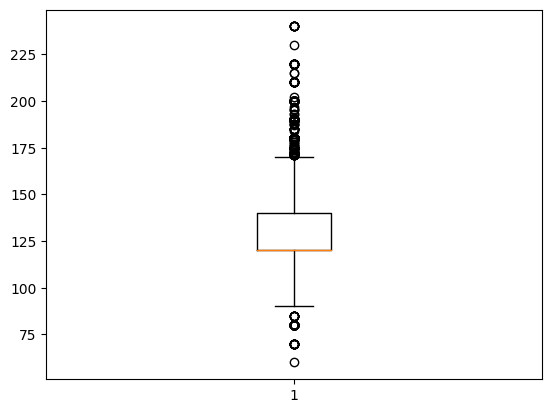

In [30]:
plt.boxplot(df['ap_hi'])

## Visina

{'whiskers': [<matplotlib.lines.Line2D at 0x211df54fd10>,
 'caps': [<matplotlib.lines.Line2D at 0x211df527fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x211df54f090>],
 'medians': [<matplotlib.lines.Line2D at 0x211df556910>],
 'fliers': [<matplotlib.lines.Line2D at 0x211df52b2d0>],
 'means': []}

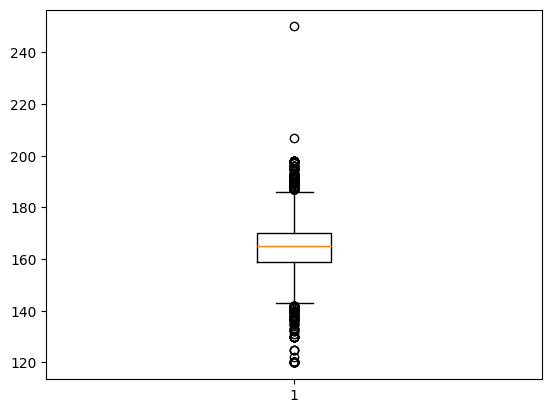

In [31]:
plt.boxplot(df['height'])

## Masa

{'whiskers': [<matplotlib.lines.Line2D at 0x211df57b410>,
 'caps': [<matplotlib.lines.Line2D at 0x211df5b5490>,
 'boxes': [<matplotlib.lines.Line2D at 0x211df5ab290>],
 'medians': [<matplotlib.lines.Line2D at 0x211df5b6b10>],
 'fliers': [<matplotlib.lines.Line2D at 0x211df56d050>],
 'means': []}

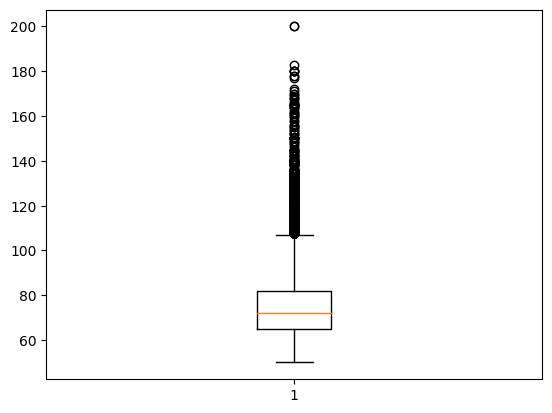

In [32]:
plt.boxplot(df['weight'])

In [ ]:
df.describe()

# Podela baze na test i trening skup
Trening skup sadrzi 90% podataka iz baze, a test skup sadrzi 10%

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=10,stratify=y)

# Standardizacija

In [9]:
s = StandardScaler()
s.fit(x_train)
x_train_std = s.transform(x_train)
x_test_std = s.transform(x_test)
x_train_std = pd.DataFrame(x_train_std)
x_test_std = pd.DataFrame(x_test_std)

x_train_std.columns = list(x.columns)
x_test_std.columns = list(x.columns)
x_train_std.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0.455856,-0.736782,0.056614,-0.036756,0.788308,0.881106,-0.538628,-0.397542,-0.311365,-0.239038,0.493418
1,-0.587684,-0.736782,-1.090285,-1.396653,-0.406386,-0.150729,-0.538628,-0.397542,-0.311365,-0.239038,0.493418
2,-0.781547,1.357254,-0.070820,-0.323050,-1.003732,-1.182563,0.929893,3.085549,-0.311365,-0.239038,-2.026679
3,1.327432,-0.736782,-0.835419,2.325170,2.580349,1.912940,2.398413,-0.397542,-0.311365,-0.239038,0.493418
4,-0.856578,1.357254,1.076079,-1.396653,0.190961,0.881106,-0.538628,-0.397542,-0.311365,-0.239038,-2.026679


# GridSearchCV
Funkcija koja se koristi za pronalazenje najbolje kombinacije hiperparametra za odredjeni model. Takodje, ova funkcija omogucava i unakrsnu validaciju uzoraka, u ovom slucaju uzeto je da se uzorci dele na 10 podskupova (u praksi se najcesce korsti da je cv = 10)

## Logisticka regresija

In [18]:
parameters_LR_std = {'solver':('lbfgs', 'sag', 'saga')}
classifier_LR_std = LogisticRegression(fit_intercept = True)
clf_LR_std = GridSearchCV(classifier_LR_std, parameters_LR_std, scoring='recall', cv=10, verbose=3)
clf_LR_std.fit(x_train_std, y_train)

print("najbolji skor: ", clf_LR_std.best_score_)
print("najbolji hiperparametri: ", clf_LR_std.best_params_)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV 1/10] END .....................solver=lbfgs;, score=0.661 total time=   0.1s
[CV 2/10] END .....................solver=lbfgs;, score=0.678 total time=   0.2s
[CV 3/10] END .....................solver=lbfgs;, score=0.666 total time=   0.1s
[CV 4/10] END .....................solver=lbfgs;, score=0.676 total time=   0.2s
[CV 5/10] END .....................solver=lbfgs;, score=0.676 total time=   0.1s
[CV 6/10] END .....................solver=lbfgs;, score=0.660 total time=   0.1s
[CV 7/10] END .....................solver=lbfgs;, score=0.667 total time=   0.2s
[CV 8/10] END .....................solver=lbfgs;, score=0.675 total time=   0.1s
[CV 9/10] END .....................solver=lbfgs;, score=0.668 total time=   0.1s
[CV 10/10] END ....................solver=lbfgs;, score=0.664 total time=   0.1s
[CV 1/10] END .......................solver=sag;, score=0.661 total time=   0.3s
[CV 2/10] END .......................solver=sag;

## kNN

In [9]:
parameters_kNN_std = {'n_neighbors':[9,11,13,15,17], 'metric':('chebyshev', 'euclidean', 'manhattan')}
classifier_kNN_std = KNeighborsClassifier()
clf_kNN_std = GridSearchCV(classifier_kNN_std, parameters_kNN_std, scoring='recall', cv=10, verbose=3)
clf_kNN_std.fit(x_train_std, y_train)

print("najbolji skor: ", clf_kNN_std.best_score_)
print("najbolji hiperparametri: ", clf_kNN_std.best_params_)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV 1/10] END ..metric=chebyshev, n_neighbors=9;, score=0.679 total time=   1.7s
[CV 2/10] END ..metric=chebyshev, n_neighbors=9;, score=0.693 total time=   1.6s
[CV 3/10] END ..metric=chebyshev, n_neighbors=9;, score=0.692 total time=   1.6s
[CV 4/10] END ..metric=chebyshev, n_neighbors=9;, score=0.692 total time=   1.5s
[CV 5/10] END ..metric=chebyshev, n_neighbors=9;, score=0.690 total time=   1.6s
[CV 6/10] END ..metric=chebyshev, n_neighbors=9;, score=0.683 total time=   1.7s
[CV 7/10] END ..metric=chebyshev, n_neighbors=9;, score=0.681 total time=   2.7s
[CV 8/10] END ..metric=chebyshev, n_neighbors=9;, score=0.689 total time=   1.6s
[CV 9/10] END ..metric=chebyshev, n_neighbors=9;, score=0.692 total time=   2.0s
[CV 10/10] END .metric=chebyshev, n_neighbors=9;, score=0.678 total time=   1.9s
[CV 1/10] END .metric=chebyshev, n_neighbors=11;, score=0.681 total time=   2.0s
[CV 2/10] END .metric=chebyshev, n_neighbors=1

## Random Forest Tree

In [ ]:
parameters_RFT = {'n_estimators': [100, 325, 550, 775, 1000],'max_depth': [10, 50, 100]}
classifier_RFT = RandomForestClassifier()
clf_RFT = GridSearchCV(classifier_RFT, parameters_RFT, scoring='recall', cv=10, verbose=3)
clf_RFT.fit(x_train, y_train)

print("najbolji skor: ", clf_RFT.best_score_)
print("najbolji hiperparametri: ", clf_RFT.best_params_)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV 1/10] END ...max_depth=10, n_estimators=100;, score=0.667 total time=   4.9s
[CV 2/10] END ...max_depth=10, n_estimators=100;, score=0.698 total time=   4.2s
[CV 3/10] END ...max_depth=10, n_estimators=100;, score=0.684 total time=   4.1s
[CV 4/10] END ...max_depth=10, n_estimators=100;, score=0.685 total time=   4.8s
[CV 5/10] END ...max_depth=10, n_estimators=100;, score=0.686 total time=   4.1s
[CV 6/10] END ...max_depth=10, n_estimators=100;, score=0.680 total time=   4.2s
[CV 7/10] END ...max_depth=10, n_estimators=100;, score=0.686 total time=   4.9s
[CV 8/10] END ...max_depth=10, n_estimators=100;, score=0.681 total time=   4.1s
[CV 9/10] END ...max_depth=10, n_estimators=100;, score=0.681 total time=   4.0s
[CV 10/10] END ..max_depth=10, n_estimators=100;, score=0.675 total time=   4.8s
[CV 1/10] END ...max_depth=10, n_estimators=325;, score=0.666 total time=  14.9s
[CV 2/10] END ...max_depth=10, n_estimators=32

## SVM



In [14]:
parameters_SVC_std = {'C':[0.1, 1, 10], 'gamma':[0.1, 1, 10]}
classifier_SVC_std = SVC(kernel = 'rbf')
clf_SVC_std = GridSearchCV(classifier_SVC_std, parameters_SVC_std, scoring='recall', cv=10, verbose=3)
clf_SVC_std.fit(x_train_std, y_train)

print("najbolji skor: ", clf_SVC_std.best_score_)
print("najbolji hiperparametri: ", clf_SVC_std.best_params_)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV 1/10] END .................C=0.1, gamma=0.1;, score=0.669 total time= 1.5min
[CV 2/10] END .................C=0.1, gamma=0.1;, score=0.683 total time= 2.2min
[CV 3/10] END .................C=0.1, gamma=0.1;, score=0.669 total time= 2.6min
[CV 4/10] END .................C=0.1, gamma=0.1;, score=0.676 total time= 1.9min
[CV 5/10] END .................C=0.1, gamma=0.1;, score=0.679 total time= 2.1min
[CV 6/10] END .................C=0.1, gamma=0.1;, score=0.671 total time= 1.4min
[CV 7/10] END .................C=0.1, gamma=0.1;, score=0.678 total time= 1.4min
[CV 8/10] END .................C=0.1, gamma=0.1;, score=0.678 total time= 1.4min
[CV 9/10] END .................C=0.1, gamma=0.1;, score=0.673 total time= 1.4min
[CV 10/10] END ................C=0.1, gamma=0.1;, score=0.673 total time= 1.7min
[CV 1/10] END ...................C=0.1, gamma=1;, score=0.757 total time= 2.7min
[CV 2/10] END ...................C=0.1, gamma=1;

In [15]:
parameters_SVC_std1 = {'kernel':('linear','poly')}
classifier_SVC_std1 = SVC(degree = 3)
clf_SVC_std1 = GridSearchCV(classifier_SVC_std1, parameters_SVC_std1, scoring='recall', cv=10, verbose=3)
clf_SVC_std1.fit(x_train_std, y_train)

print("najbolji skor: ", clf_SVC_std1.best_score_)
print("najbolji hiperparametri: ", clf_SVC_std1.best_params_)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
[CV 1/10] END ....................kernel=linear;, score=0.626 total time= 1.5min
[CV 2/10] END ....................kernel=linear;, score=0.638 total time= 1.5min
[CV 3/10] END ....................kernel=linear;, score=0.635 total time= 1.5min
[CV 4/10] END ....................kernel=linear;, score=0.643 total time= 1.7min
[CV 5/10] END ....................kernel=linear;, score=0.639 total time= 2.0min
[CV 6/10] END ....................kernel=linear;, score=0.625 total time= 1.9min
[CV 7/10] END ....................kernel=linear;, score=0.634 total time= 2.0min
[CV 8/10] END ....................kernel=linear;, score=0.634 total time= 1.6min
[CV 9/10] END ....................kernel=linear;, score=0.640 total time= 1.5min
[CV 10/10] END ...................kernel=linear;, score=0.626 total time= 1.5min
[CV 1/10] END ......................kernel=poly;, score=0.601 total time= 1.6min
[CV 2/10] END ......................kernel=poly;

# Smanjenje dimenzionalnosti - PCA

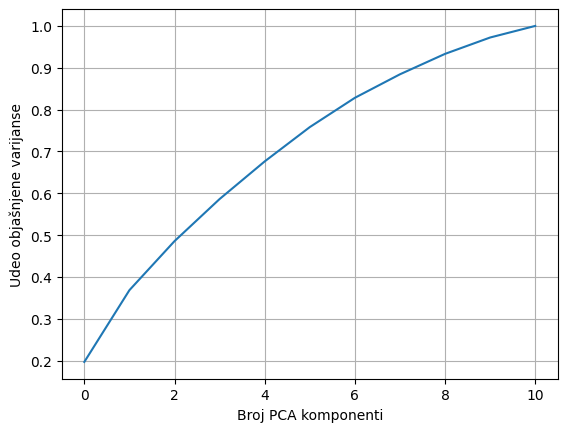

In [10]:
pca = PCA(n_components=None) 
pca.fit(x_train_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Broj PCA komponenti')
plt.ylabel('Udeo objašnjene varijanse')
plt.grid(True)

In [35]:
pca_finalno = PCA(n_components=7)
pca_finalno.fit(x_train_std)
x_train_pca = pca_finalno.transform(x_train_std)
x_test_pca = pca_finalno.transform(x_test_std)

## Logisticka regresija PCA

In [13]:
parameters_LR_PCA = {'solver':('lbfgs', 'sag', 'saga')}
classifier_LR_PCA = LogisticRegression(fit_intercept = True)
clf_LR_PCA = GridSearchCV(classifier_LR_PCA, parameters_LR_PCA, scoring='recall', cv=10, verbose=3)
clf_LR_PCA.fit(x_train_pca, y_train)

print("najbolji skor: ", clf_LR_PCA.best_score_)
print("najbolji hiperparametri: ", clf_LR_PCA.best_params_)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV 1/10] END .....................solver=lbfgs;, score=0.670 total time=   0.0s
[CV 2/10] END .....................solver=lbfgs;, score=0.695 total time=   0.0s
[CV 3/10] END .....................solver=lbfgs;, score=0.682 total time=   0.0s
[CV 4/10] END .....................solver=lbfgs;, score=0.682 total time=   0.0s
[CV 5/10] END .....................solver=lbfgs;, score=0.684 total time=   0.0s
[CV 6/10] END .....................solver=lbfgs;, score=0.674 total time=   0.0s
[CV 7/10] END .....................solver=lbfgs;, score=0.680 total time=   0.0s
[CV 8/10] END .....................solver=lbfgs;, score=0.684 total time=   0.0s
[CV 9/10] END .....................solver=lbfgs;, score=0.683 total time=   0.0s
[CV 10/10] END ....................solver=lbfgs;, score=0.673 total time=   0.0s
[CV 1/10] END .......................solver=sag;, score=0.670 total time=   0.1s
[CV 2/10] END .......................solver=sag;

## kNN PCA

In [14]:
parameters_kNN_PCA = {'n_neighbors':[9,11,13,15,17], 'metric':('chebyshev', 'euclidean', 'manhattan')}
classifier_kNN_PCA = KNeighborsClassifier()
clf_kNN_PCA = GridSearchCV(classifier_kNN_PCA, parameters_kNN_PCA, scoring='recall', cv=10, verbose=3)
clf_kNN_PCA.fit(x_train_pca, y_train)

print("najbolji skor: ", clf_kNN_PCA.best_score_)
print("najbolji hiperparametri: ", clf_kNN_PCA.best_params_)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV 1/10] END ..metric=chebyshev, n_neighbors=9;, score=0.681 total time=   0.3s
[CV 2/10] END ..metric=chebyshev, n_neighbors=9;, score=0.695 total time=   0.2s
[CV 3/10] END ..metric=chebyshev, n_neighbors=9;, score=0.694 total time=   0.3s
[CV 4/10] END ..metric=chebyshev, n_neighbors=9;, score=0.696 total time=   0.2s
[CV 5/10] END ..metric=chebyshev, n_neighbors=9;, score=0.682 total time=   0.2s
[CV 6/10] END ..metric=chebyshev, n_neighbors=9;, score=0.672 total time=   0.2s
[CV 7/10] END ..metric=chebyshev, n_neighbors=9;, score=0.680 total time=   0.2s
[CV 8/10] END ..metric=chebyshev, n_neighbors=9;, score=0.694 total time=   0.2s
[CV 9/10] END ..metric=chebyshev, n_neighbors=9;, score=0.694 total time=   0.2s
[CV 10/10] END .metric=chebyshev, n_neighbors=9;, score=0.679 total time=   0.2s
[CV 1/10] END .metric=chebyshev, n_neighbors=11;, score=0.686 total time=   0.3s
[CV 2/10] END .metric=chebyshev, n_neighbors=1

## Random Forest Tree PCA

In [17]:
parameters_RFT_PCA = {'n_estimators': [100, 325, 550, 775, 1000],'max_depth': [10, 50, 100]}
classifier_RFT_PCA = RandomForestClassifier()
clf_RFT_PCA = GridSearchCV(classifier_RFT_PCA, parameters_RFT_PCA, scoring='recall', cv=10, verbose=3)
clf_RFT_PCA.fit(x_train_pca, y_train)

print("najbolji skor: ", clf_RFT_PCA.best_score_)
print("najbolji hiperparametri: ", clf_RFT_PCA.best_params_)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV 1/10] END ...max_depth=10, n_estimators=100;, score=0.674 total time=   9.3s
[CV 2/10] END ...max_depth=10, n_estimators=100;, score=0.694 total time=   8.2s
[CV 3/10] END ...max_depth=10, n_estimators=100;, score=0.681 total time=   9.0s
[CV 4/10] END ...max_depth=10, n_estimators=100;, score=0.696 total time=   9.0s
[CV 5/10] END ...max_depth=10, n_estimators=100;, score=0.689 total time=   9.1s
[CV 6/10] END ...max_depth=10, n_estimators=100;, score=0.671 total time=   9.2s
[CV 7/10] END ...max_depth=10, n_estimators=100;, score=0.683 total time=   8.9s
[CV 8/10] END ...max_depth=10, n_estimators=100;, score=0.690 total time=   8.9s
[CV 9/10] END ...max_depth=10, n_estimators=100;, score=0.693 total time=   9.4s
[CV 10/10] END ..max_depth=10, n_estimators=100;, score=0.685 total time=   9.3s
[CV 1/10] END ...max_depth=10, n_estimators=325;, score=0.674 total time=  29.8s
[CV 2/10] END ...max_depth=10, n_estimators=32

## SVM PCA

In [18]:
parameters_SVC_pca = {'C':[0.1, 1, 10], 'gamma':[0.1, 1, 10]}
classifier_SVC_pca = SVC(kernel = 'rbf')
clf_SVC_pca = GridSearchCV(classifier_SVC_pca, parameters_SVC_pca, scoring='recall', cv=10, verbose=3,n_jobs=-1)
clf_SVC_pca.fit(x_train_pca,y_train)

print("najbolji skor: ", clf_SVC_pca.best_score_)
print("najbolji hiperparametri: ", clf_SVC_pca.best_params_)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
najbolji skor:  0.8821126431657271
najbolji hiperparametri:  {'C': 0.1, 'gamma': 10}


In [10]:
parameters_SVC_pca1 = {'kernel':('linear','poly')}
classifier_SVC_pca1 = SVC(degree = 3)
clf_SVC_pca1 = GridSearchCV(classifier_SVC_pca1, parameters_SVC_pca1, scoring='recall', cv=10, verbose=3,n_jobs=-1)
clf_SVC_pca1.fit(x_train_pca,y_train)

print("najbolji skor: ", clf_SVC_pca1.best_score_)
print("najbolji hiperparametri: ", clf_SVC_pca1.best_params_)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
najbolji skor:  0.6459433768730879
najbolji hiperparametri:  {'kernel': 'linear'}


# TESTIRANJE TRI NAJBOLJA MODELA

## SVM

sensitivity/recall:  0.9093601895734598
precision:  0.5486061472480344
accuracy:  0.5821776335202125
F score:  0.6843513152028533


Text(0.5, 1.0, 'SVM')

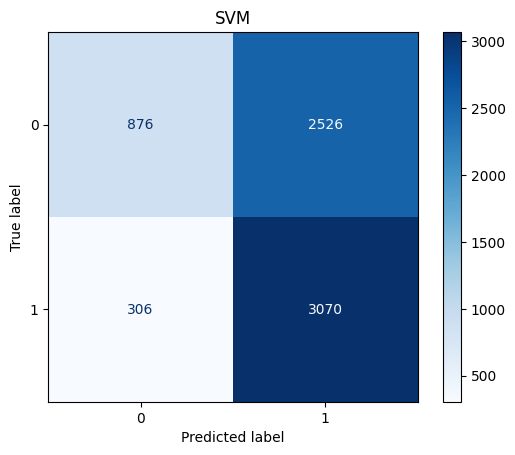

In [38]:
classifier_SVC_test = SVC(C = 0.1, gamma = 10)
classifier_SVC_test.fit(x_train_std, y_train)
y_predicted_SVC = classifier_SVC_test.predict(x_test_std)

sensitivity = metrics.recall_score(y_test, y_predicted_SVC)
precision = metrics.precision_score(y_test, y_predicted_SVC)
accuracy = metrics.accuracy_score(y_test, y_predicted_SVC)
f_score = metrics.f1_score(y_test, y_predicted_SVC)

print('sensitivity/recall: ', sensitivity)
print('precision: ', precision)
print('accuracy: ', accuracy)
print('F score: ', f_score)
conf_mat = confusion_matrix(y_test, y_predicted_SVC, labels=classifier_SVC_test.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,  display_labels=classifier_SVC_test.classes_)
disp.plot(cmap="Blues")
plt.title('SVM')


## SVM PCA

sensitivity/recall:  0.8761848341232228
precision:  0.5781860828772478
accuracy:  0.6199468869873119
F score:  0.6966556759302873


Text(0.5, 1.0, 'SVM_PCA')

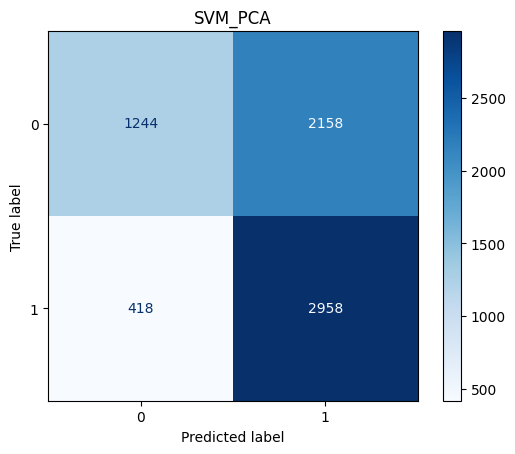

In [39]:
classifier_SVC_test_pca = SVC(C = 0.1, gamma = 10)
classifier_SVC_test_pca.fit(x_train_pca, y_train)
y_predicted_SVC_pca = classifier_SVC_test_pca.predict(x_test_pca)

sensitivity = metrics.recall_score(y_test, y_predicted_SVC_pca)
precision = metrics.precision_score(y_test, y_predicted_SVC_pca)
accuracy = metrics.accuracy_score(y_test, y_predicted_SVC_pca)
f_score = metrics.f1_score(y_test, y_predicted_SVC_pca)

print('sensitivity/recall: ', sensitivity)
print('precision: ', precision)
print('accuracy: ', accuracy)
print('F score: ', f_score)

conf_mat = confusion_matrix(y_test, y_predicted_SVC_pca, labels=classifier_SVC_test_pca.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,  display_labels=classifier_SVC_test_pca.classes_)
disp.plot(cmap="Blues")
plt.title('SVM_PCA')

## Random Forest Tree

sensitivity/recall:  0.7040876777251185
precision:  0.715748268593797
accuracy:  0.7133372676305695
F score:  0.7098700910855607


Text(0.5, 1.0, 'Random Forest Tree')

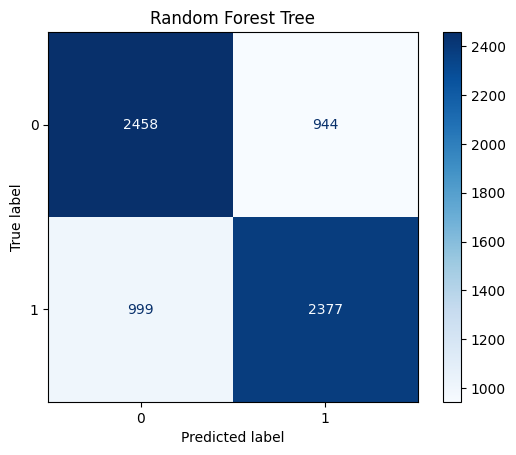

In [40]:
classifier_RFT_test = RandomForestClassifier(max_depth = 100, n_estimators = 775)
classifier_RFT_test.fit(x_train, y_train)
y_predicted_RFT_test = classifier_RFT_test.predict(x_test)

sensitivity = metrics.recall_score(y_test, y_predicted_RFT_test)
precision = metrics.precision_score(y_test, y_predicted_RFT_test)
accuracy = metrics.accuracy_score(y_test, y_predicted_RFT_test)
f_score = metrics.f1_score(y_test, y_predicted_RFT_test)

print('sensitivity/recall: ', sensitivity)
print('precision: ', precision)
print('accuracy: ', accuracy)
print('F score: ', f_score)

conf_mat = confusion_matrix(y_test, y_predicted_RFT_test, labels=classifier_RFT_test.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,  display_labels=classifier_RFT_test.classes_)
disp.plot(cmap="Blues")
plt.title('Random Forest Tree')